<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Frame-the-Problem" data-toc-modified-id="Frame-the-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Frame the Problem</a></span></li><li><span><a href="#Load-and-inspect-the-data" data-toc-modified-id="Load-and-inspect-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and inspect the data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Numeric-Features" data-toc-modified-id="Numeric-Features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numeric Features</a></span></li></ul></li><li><span><a href="#Preprocess-Data" data-toc-modified-id="Preprocess-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocess Data</a></span></li><li><span><a href="#Define-Pipeline" data-toc-modified-id="Define-Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define Pipeline</a></span></li><li><span><a href="#Process-Data-Using-Pipeline" data-toc-modified-id="Process-Data-Using-Pipeline-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Process Data Using Pipeline</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Construct-dataframe-from-array-output-of-pipeline" data-toc-modified-id="Construct-dataframe-from-array-output-of-pipeline-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Construct dataframe from array output of pipeline</a></span></li></ul></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Extreme-Gradient-Regressor" data-toc-modified-id="Extreme-Gradient-Regressor-7.0.3"><span class="toc-item-num">7.0.3&nbsp;&nbsp;</span>Extreme Gradient Regressor</a></span></li><li><span><a href="#Extra-Trees-Regressor" data-toc-modified-id="Extra-Trees-Regressor-7.0.4"><span class="toc-item-num">7.0.4&nbsp;&nbsp;</span>Extra Trees Regressor</a></span></li><li><span><a href="#K-Nearest-Neighbor-Regressor" data-toc-modified-id="K-Nearest-Neighbor-Regressor-7.0.5"><span class="toc-item-num">7.0.5&nbsp;&nbsp;</span>K-Nearest Neighbor Regressor</a></span></li></ul></li></ul></li><li><span><a href="#Model-Tuning" data-toc-modified-id="Model-Tuning-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Tuning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#XGB-Regressor" data-toc-modified-id="XGB-Regressor-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>XGB Regressor</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.0.2"><span class="toc-item-num">8.0.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Extra-Trees-Regressor" data-toc-modified-id="Extra-Trees-Regressor-8.0.3"><span class="toc-item-num">8.0.3&nbsp;&nbsp;</span>Extra Trees Regressor</a></span></li></ul></li></ul></li><li><span><a href="#Prediction-on-Test-Set-for-Submission" data-toc-modified-id="Prediction-on-Test-Set-for-Submission-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Prediction on Test Set for Submission</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Predicting Student Loan Repayment Rate <a class="tocSkip">

Microsoft Capstone Project_2017- Predicting Student Loan Repayment Rate

This is the final project for the Microsoft Data Science Professional Certificate program.  The project was set up as a data
science competition through [DrivenData](https://www.datasciencecapstone.org/competitions/1/student-loans/page/1/).  The goal was to predict student loan repayment rate which is defined as the percentage
of students actively reducing the balance of their loans.  This is seen as a better metric than default rate where the student
failed to make payments or made payments that did not reduce the balance of the loan.  Repayment rate is seen as a proxy for 
gainful employment that allows the former student to pay down the loan balance.  Gaining insight into the predictors of loan repayment rates could help students make better decisions when applying to schools.

I have learned a lot since writing the script for this project so I have gone back and updated the original script with these new learnings and techniques.  In particular, I found Philip Goddard's [blog post](http://philipmgoddard.com/modeling/sklearn_pipelines) and accompanying [notebook](https://github.com/philipmgoddard/pipelines/blob/master/pipe_demo.ipynb) about pipelines with scikit-learn especially enlightening and have implemented many of the techniques he covers.   


## Frame the Problem

As this was a competition-based project, the objective was unambiguous in that student loan repayment rate predictions were to be made on a test using RMSE as a metric for model performance.  The question was also posed 'Can you help students understand which institutions are good investments, and which ones leave them in debt?'  The challenge here is that predictive models with the best performance are not necessarily models that are readily interpretable.  Thus, to help student's make better decisions about an institution to attend, exploratory data analysis focused on the relationship of features and repayment rate. 
Having framed the problem, we need to convert it into a data science problem.  Namely, how do we process a data set with 443 features and over 8700 instances and build a model that can predict student loan repayment rate.  This notebook covers the data science workflow with a focus on the following areas:

1) Use exploratory data analysis to uncover insights that would help a student understand what features are both positively and negatively correlated with student loan repayment rate.

2) Address issues in the data including missing values, multicollinearity, and zero or near-zero variance of features.

3)  Fit a model on the processed training data and use that model to make predictions on the test set with the goal of minimizing the RMSE of the predictions.

##  Load and inspect the data

In [1]:
# Set to ignore warnings for deprecated code
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
#Import Packages
import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.grid_search import  RandomizedSearchCV
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats as st
from scipy.stats import randint as sp_randint
from scipy.stats import beta
from xgboost import XGBRegressor as xgb
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.core.interactiveshell import InteractiveShell

# custom imports
from custom_transformers import DataFrameSelector, ZeroVariance, FindCorrelation
from custom_transformers import OptionalStandardScaler, ManualDropper, PipelineChecker

In [4]:
# This allows full output of a cell rather than than just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# opens up a Jupyter console
%qtconsole

In [6]:
# makes plots embedded in document in the 'seaborn-notebook' style
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.style.context('ggplot');


The data was provided by the competition organizer.  It is made public by the United States Department of Education.  It was noted, however, that the repayment rate value was adjusted for the competition.  The training data and label along with the test set for the competition were provided in separate CSV files.  These were imported into data frames using the pd.read_csv() function with row_id set as the index. 

In [7]:
#Read in training data and the training label or dependent variable
df_train=pd.read_csv('train_values.csv', index_col='row_id')
df_label=pd.read_csv('train_labels.csv', index_col='row_id')
df_test=pd.read_csv('test_values.csv', index_col='row_id')

A quick look at our training data shows that we have 8705 instances and 443 features.  We also get a breakdown of the data types or dtypes in our data set.

In [8]:
print('{} \n\nunique dtypes: {}'.format(df_train.info(),
                                        set([df_train[x].dtype for x in df_train])))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Columns: 443 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(419), int64(1), object(23)
memory usage: 29.5+ MB
None 

unique dtypes: {dtype('int64'), dtype('float64'), dtype('O')}


We can do the same for our test set.

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 443 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(419), int64(1), object(23)
memory usage: 21.6+ MB


Taking a look at our dependent variable in the df_label data frame, we see it contains the single column for repayment rate.  The descriptive statistics from the output of the describe() function tells us that the mean student loan repayment rate is 47%.

In [10]:
# training labels
df_label.info()
df_label.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Data columns (total 1 columns):
repayment_rate    8705 non-null float64
dtypes: float64(1)
memory usage: 136.0 KB


,repayment_rate
count,8705.000000
mean,47.370863
std,20.987642
min,5.162708
25%,30.228006
50%,44.855045
75%,62.622899
max,100.473631


Plotting the distribution of our dependent variable (repayment_rate) shows that it is approximately normally distributed.

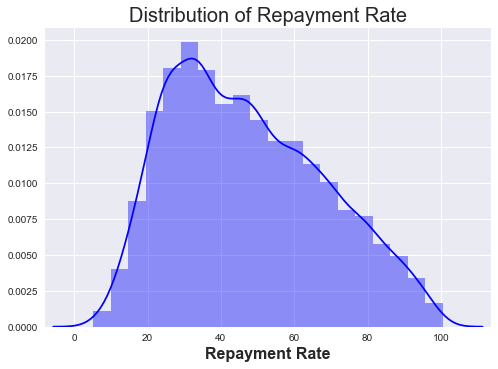

In [13]:
# plot histogram of repayment_rate
sns.set_style("darkgrid")
_ = sns.distplot(df_label.repayment_rate, color='b',bins=20)
plt.xlabel('Repayment Rate', fontsize=16, fontweight='bold')
plt.title('Distribution of Repayment Rate', fontsize=20)
plt.margins(0.02)
plt.show();

To get a handle on the extent of missing data, we can plot the counts of missing data by column and row in both the training and test sets. We can see from the plot on the left that there's not an insignificant amount of feature with >20% missing values and some approaching 100% missing values.  We'll need a strategy to determine whether to impute these missing values or remove features.  There's also a group of instances that are missing most of their values in both the training and testing sets as shown in the plot on the right.  It's worth noting that we can't just remove instances from the test set even if they contain predominantly missing values.  This was a competition-based capstone project, so we'll need to make a prediction for each instance in the test set.  We can, however, remove features as we see fit based on feature selection of our training set.

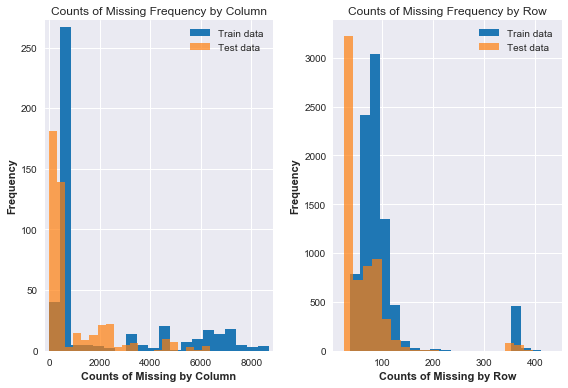

In [14]:
# Plots of missing values by column and row in both training and test sets.
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
plt.subplot(121)
train=df_train.isnull().sum()  #try label for legend?
test=df_test.isnull().sum()
_ = plt.hist(train, bins=20, label='Train data')
_ = plt.hist(test, bins=20, label='Test data', alpha=0.7)
_ = plt.title('Counts of Missing Frequency by Column')
_ = plt.xlabel('Counts of Missing by Column', fontweight='bold')
_ = plt.ylabel('Frequency', fontweight='bold')
_ = plt.legend(loc='upper right')
plt.margins(0.02)

plt.subplot(1,2,2)
train=df_train.isnull().sum(axis=1)  
test=df_test.isnull().sum(axis=1)
_ = plt.hist(train, bins=20, label='Train data')
_ = plt.hist(test, bins=20, label='Test data', alpha=0.7)
_ = plt.title('Counts of Missing Frequency by Row')
_ = plt.xlabel('Counts of Missing by Row', fontweight='bold')
_ = plt.ylabel('Frequency', fontweight='bold')
_ = plt.legend(loc='upper right')
plt.tight_layout()
plt.show;

## Exploratory Data Analysis

In this section, our goal is to get a better understanding of our data and explore how the features relate to each other and to repayment rate.  We'll first look at categorical features.

### Categorical Features

The first thing we'll do is make a new data frame that appends the repayment rate column onto the training set to facilitate plotting relationships between features and repayment rate.  Next, we'll use the dtype to create a list of columns that would be considered categorical.  Python labels columns with strings as objects or 'O'.  After selecting only columns of dtype='O', we can then convert them to a categorical data type.


In [15]:
# Create dataframe of just categorical features
df_EDA = pd.concat([df_train, df_label], axis='columns')
EDAcat_cols = [x for x in df_EDA if df_EDA[x].dtype == np.dtype('O')]
df_EDA.loc[:, EDAcat_cols] = df_EDA.loc[:, EDAcat_cols].apply(lambda x: pd.Categorical(x))

We now have a list of categorical feature names that we can use to create some visualizations. I've also included along with the plots the value counts for each level of a category to provide some perspective to the plots.

In [16]:
# Categorical column names
EDAcat_cols

['report_year',
 'school__carnegie_basic',
 'school__carnegie_size_setting',
 'school__carnegie_undergrad',
 'school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__locale',
 'school__main_campus',
 'school__men_only',
 'school__minority_serving_aanipi',
 'school__minority_serving_annh',
 'school__minority_serving_hispanic',
 'school__minority_serving_historically_black',
 'school__minority_serving_nant',
 'school__minority_serving_predominantly_black',
 'school__minority_serving_tribal',
 'school__online_only',
 'school__ownership',
 'school__region_id',
 'school__religious_affiliation',
 'school__state',
 'school__women_only']

Looking at repayment rate as it relates to school ownership, we can see that Private for-profit schools have a lower repayment rate relative to Private nonprofit and Public schools.

In [17]:
# Counts of instances in school__ownership categories
df_EDA.school__ownership.value_counts()



Private for-profit    4325
Public                2332
Private nonprofit     2048
Name: school__ownership, dtype: int64

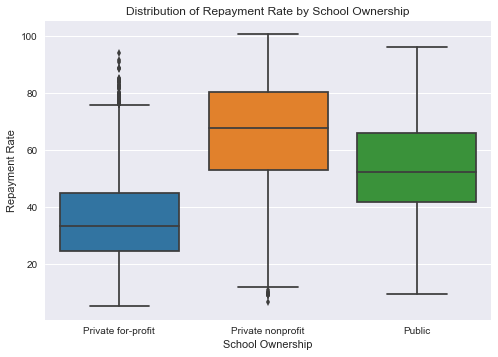

In [18]:
# Boxplot of repayment rate distribution in school__ownership categories
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__ownership',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Ownership',
       ylabel='Repayment Rate',
       title ='Distribution of Repayment Rate by School Ownership')
plt.show();

The distribution of repayment rate by school region shows quite a bit of overlap between regions.  Of note is that there is only a single instance for US Service Schools.  We may consider removing this feature prior to building a model as it doesn't appear to add much predictive value.  

In [19]:
# Counts of instances in school__region_id categories
df_EDA.school__region_id.value_counts()

Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    2050
Mid East (DE, DC, MD, NJ, NY, PA)                             1374
Great Lakes (IL, IN, MI, OH, WI)                              1365
Far West (AK, CA, HI, NV, OR, WA)                             1201
Southwest (AZ, NM, OK, TX)                                     896
Plains (IA, KS, MN, MO, NE, ND, SD)                            857
New England (CT, ME, MA, NH, RI, VT)                           531
Rocky Mountains (CO, ID, MT, UT, WY)                           344
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                 85
U.S. Service Schools                                             1
Name: school__region_id, dtype: int64

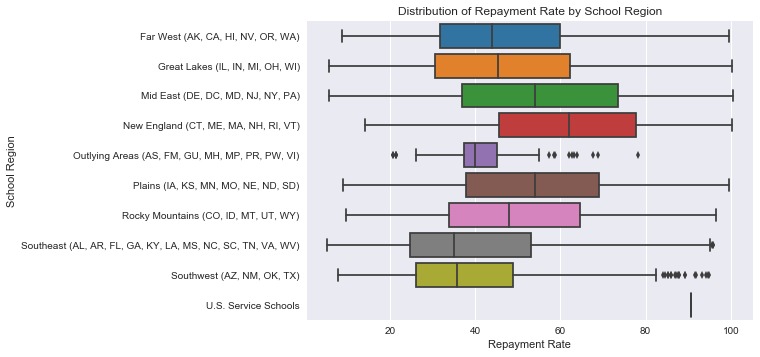

In [20]:
# Boxplot of repayment rate distribution in school__region categories
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
ax=sns.boxplot(x='repayment_rate',
            y= 'school__region_id',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='School Region',
       title='Distribution of Repayment Rate by School Region')
plt.show();

Whether or not a school is the main campus of the institution seems to have some impact on the repayment rate with main  campus schools having a higher median rate.

In [21]:
# Counts of instances in school__main_campus categories
df_EDA.school__main_campus.value_counts()

Main campus        6027
Not main campus    2678
Name: school__main_campus, dtype: int64

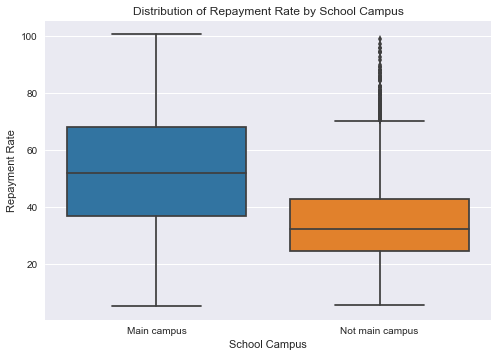

In [22]:
# Boxplot of repayment rate distribution in school__main_campus categories
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__main_campus',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Campus',
       ylabel='Repayment Rate',
       title='Distribution of Repayment Rate by School Campus')
plt.show();

There appears to be a great deal of overlap for the distribution of repayment rates in the school institution category.  Four-year schools do, however, have a higher median repayment rate relative to 2-year and <2-year schools.

In [23]:
# Counts of instances in school__institutional_characteristics_level categories
df_EDA.school__institutional_characteristics_level.value_counts()

4-year              3941
2-year              2692
Less-than-2-year    2072
Name: school__institutional_characteristics_level, dtype: int64

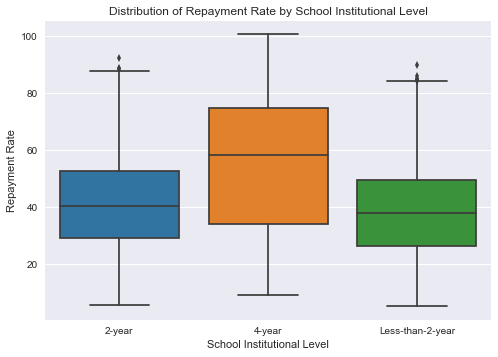

In [24]:
# Boxplot of repayment rate distribution in school__institutional_characteristics_level categories
sns.set_style("darkgrid")
ax = sns.boxplot(x= 'school__institutional_characteristics_level',
                y='repayment_rate',
                data=df_EDA)
ax.set(xlabel='School Institutional Level',
       ylabel='Repayment Rate',
       title='Distribution of Repayment Rate by School Institutional Level')
plt.show();

Moving on to the category of predominant degrees awarded, we once again see a lot of overlap in the distribution of repayment rate.  It's not clear that this feature would provide any predictive value.

In [25]:
# Counts of instances in school__degrees_awarded_predominant categories
df_EDA.school__degrees_awarded_predominant.value_counts()

Predominantly certificate-degree granting    3391
Predominantly bachelor's-degree granting     2777
Predominantly associate's-degree granting    1972
Not classified                                513
Entirely graduate-degree granting              52
Name: school__degrees_awarded_predominant, dtype: int64

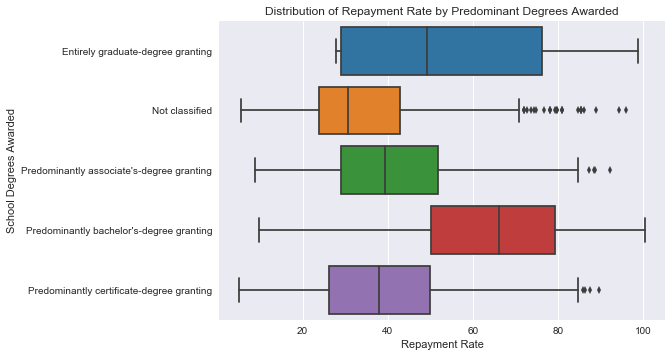

In [26]:
# Boxplot of repayment rate distribution in school__degrees_awarded_predominant categories
sns.set_style("darkgrid")
ax = sns.boxplot(y= 'school__degrees_awarded_predominant',
                x='repayment_rate',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='School Degrees Awarded',
       title='Distribution of Repayment Rate by Predominant Degrees Awarded')
plt.show();

Finally, we'll look at the categorical feature for highest degree awarded.  Again, we see comparable ranges of repayment rate and extensive overlap of the inter-quartile ranges.  Like many of these categorical features, taken alone there doesn't appear to be much predictive value.  However, it is possible that in combination with other features, there may indeed be some predictive value.

In [27]:
# Counts of instances in school__degrees_awarded_highest categories
df_EDA.school__degrees_awarded_highest.value_counts()

Certificate degree     2491
Graduate degree        2339
Associate degree       2154
Bachelor's degree      1146
Non-degree-granting     575
Name: school__degrees_awarded_highest, dtype: int64

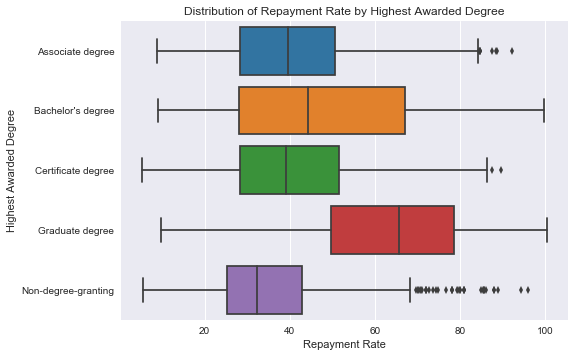

In [28]:
# Boxplot of repayment rate distribution in school__degrees_awarded_highest categories
sns.set_style("darkgrid")
ax = sns.boxplot(y= 'school__degrees_awarded_highest',
                x='repayment_rate',
                data=df_EDA)
ax.set(xlabel='Repayment Rate',
       ylabel='Highest Awarded Degree',
       title='Distribution of Repayment Rate by Highest Awarded Degree')
plt.show();

### Numeric Features

Analysis of the numeric features in this data set is a little more daunting as we have 100's of features to contend with.  We'll try some non-graphical techniques to help us devise a strategy to narrow down our list of important numeric features.
Of most interest are features that are correlated with our dependent variable- repayment rate.  We can get a feel for that by calculating the correlation of all features and then filtering that result to see the correlation between features and repayment rate.

In [29]:
# Calculate correlation between features
pearson = df_EDA.corr(method='pearson')

In [30]:
# Select correlations of features with label 
corr_with_target = pearson.iloc[-1][:-1]

We're equally interested in positive or negative correlations, so we'll sort by the absolute value of the correlation.  Below is a list with the first 30 features having the highest correlation with repayment rate.  Of note is that is that 10 of the top 13 features have to do with money.  The income level of the student's family appears to be highly predictive of student loan repayment rate.

In [31]:
# attributes sorted from the most predictive
predictivity = corr_with_target[abs(corr_with_target).argsort()[::-1]]

In [32]:
# top 30 features most highly correlated with repayment rate
predictivity[:30]

student__share_lowincome_0_30000                          -0.839633
student__share_highincome_75001_110000                     0.838509
student__demographics_avg_family_income                    0.823282
student__avg_dependent_income_2014dollars                  0.816341
student__share_dependent_lowincome_0_300000               -0.813804
student__share_dependent_highincome_110001plus             0.811990
student__demographics_median_family_income                 0.800772
student__share_highincome_110001plus                       0.795143
student__students_with_pell_grant                         -0.794821
student__share_dependent_highincome_75001_110000           0.794027
student__share_middleincome_48001_75000                    0.753407
student__share_firstgeneration_parents_somecollege         0.746319
student__demographics_first_generation                    -0.722747
admissions__act_scores_75th_percentile_math                0.717752
admissions__sat_scores_average_by_ope_id        

We can plot the relationship of these highly correlated features with the target variable to get a sense of whether the relationship is linear or otherwise.  Scatter plots of the top 15 correlated features are shown below.

C:\Users\ericg\Anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


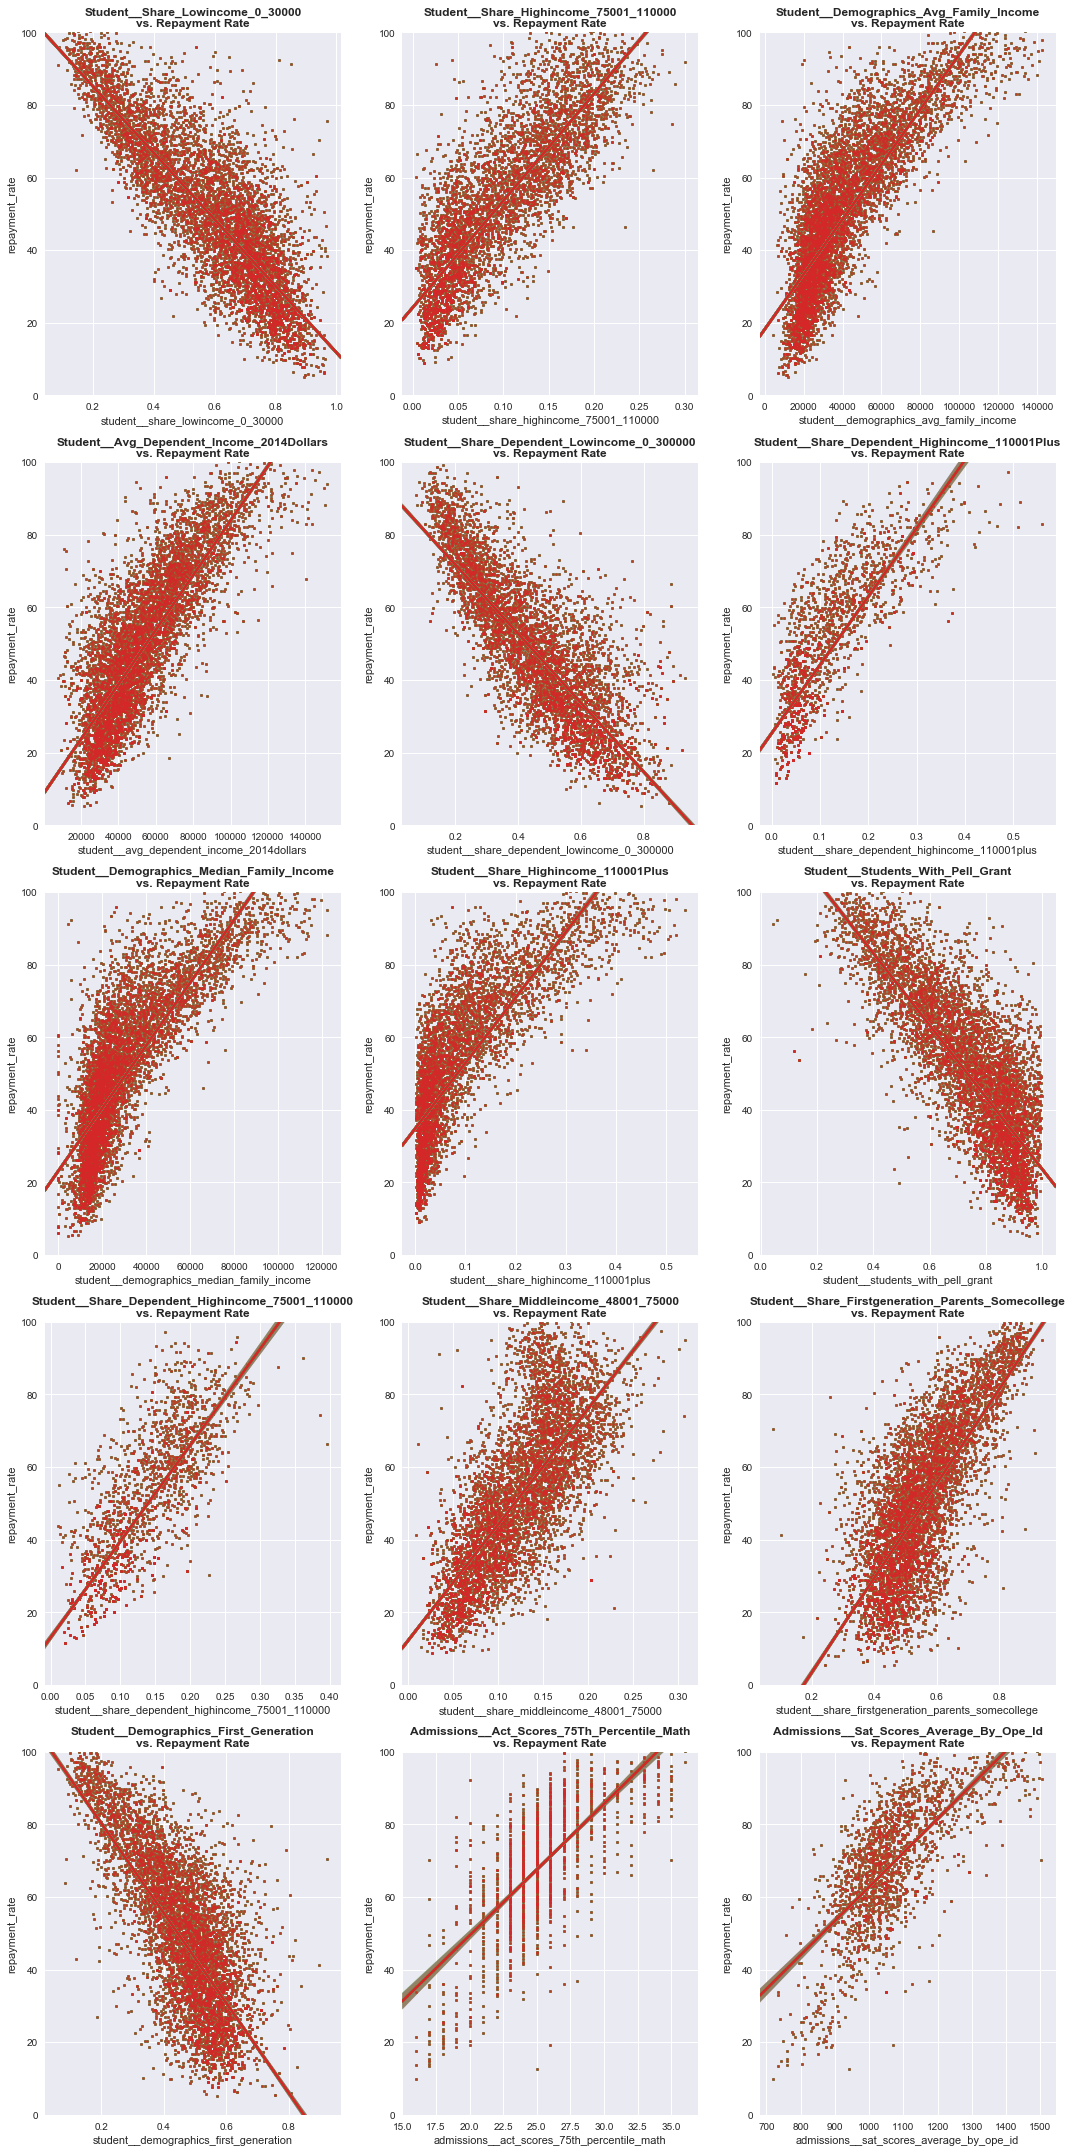

In [32]:
# Scatter plots of highly correlated features.
numb_list = list(predictivity.index[:15])

# sns.set(color_codes='muted')
plt.figure(figsize=(15,30))
plt.rcParams['axes.titleweight'] = 'bold'
fig=plt.figure

for i in range(1,len(numb_list)):
    i=1
    for element in numb_list:
        plt.subplot(5,3,i)
        plt.title(str(element).title() + '\nvs. Repayment Rate')
        sns.regplot(x=element,
                    y="repayment_rate",
                    data=df_EDA,
                    scatter_kws={'s':6})   
        i+=1
        plt.ylim(0,100)
        plt.margins(0.02)
        plt.tight_layout()  
plt.show();


While many of the features appear to have a linear relationship with the target variable, others clearly show relationships that are non-linear.  Visualizing the distribution of the features can help us understand this non-linear relationship.
Several of the features show skew in their distributions.  There is the option of transforming features with skew to convert them to a more normal distribution.  However, we'll be focusing on tree-based models that do not make any assumptions about the relationship between the dependent variable and the independent variables.

C:\Users\ericg\Anaconda3\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


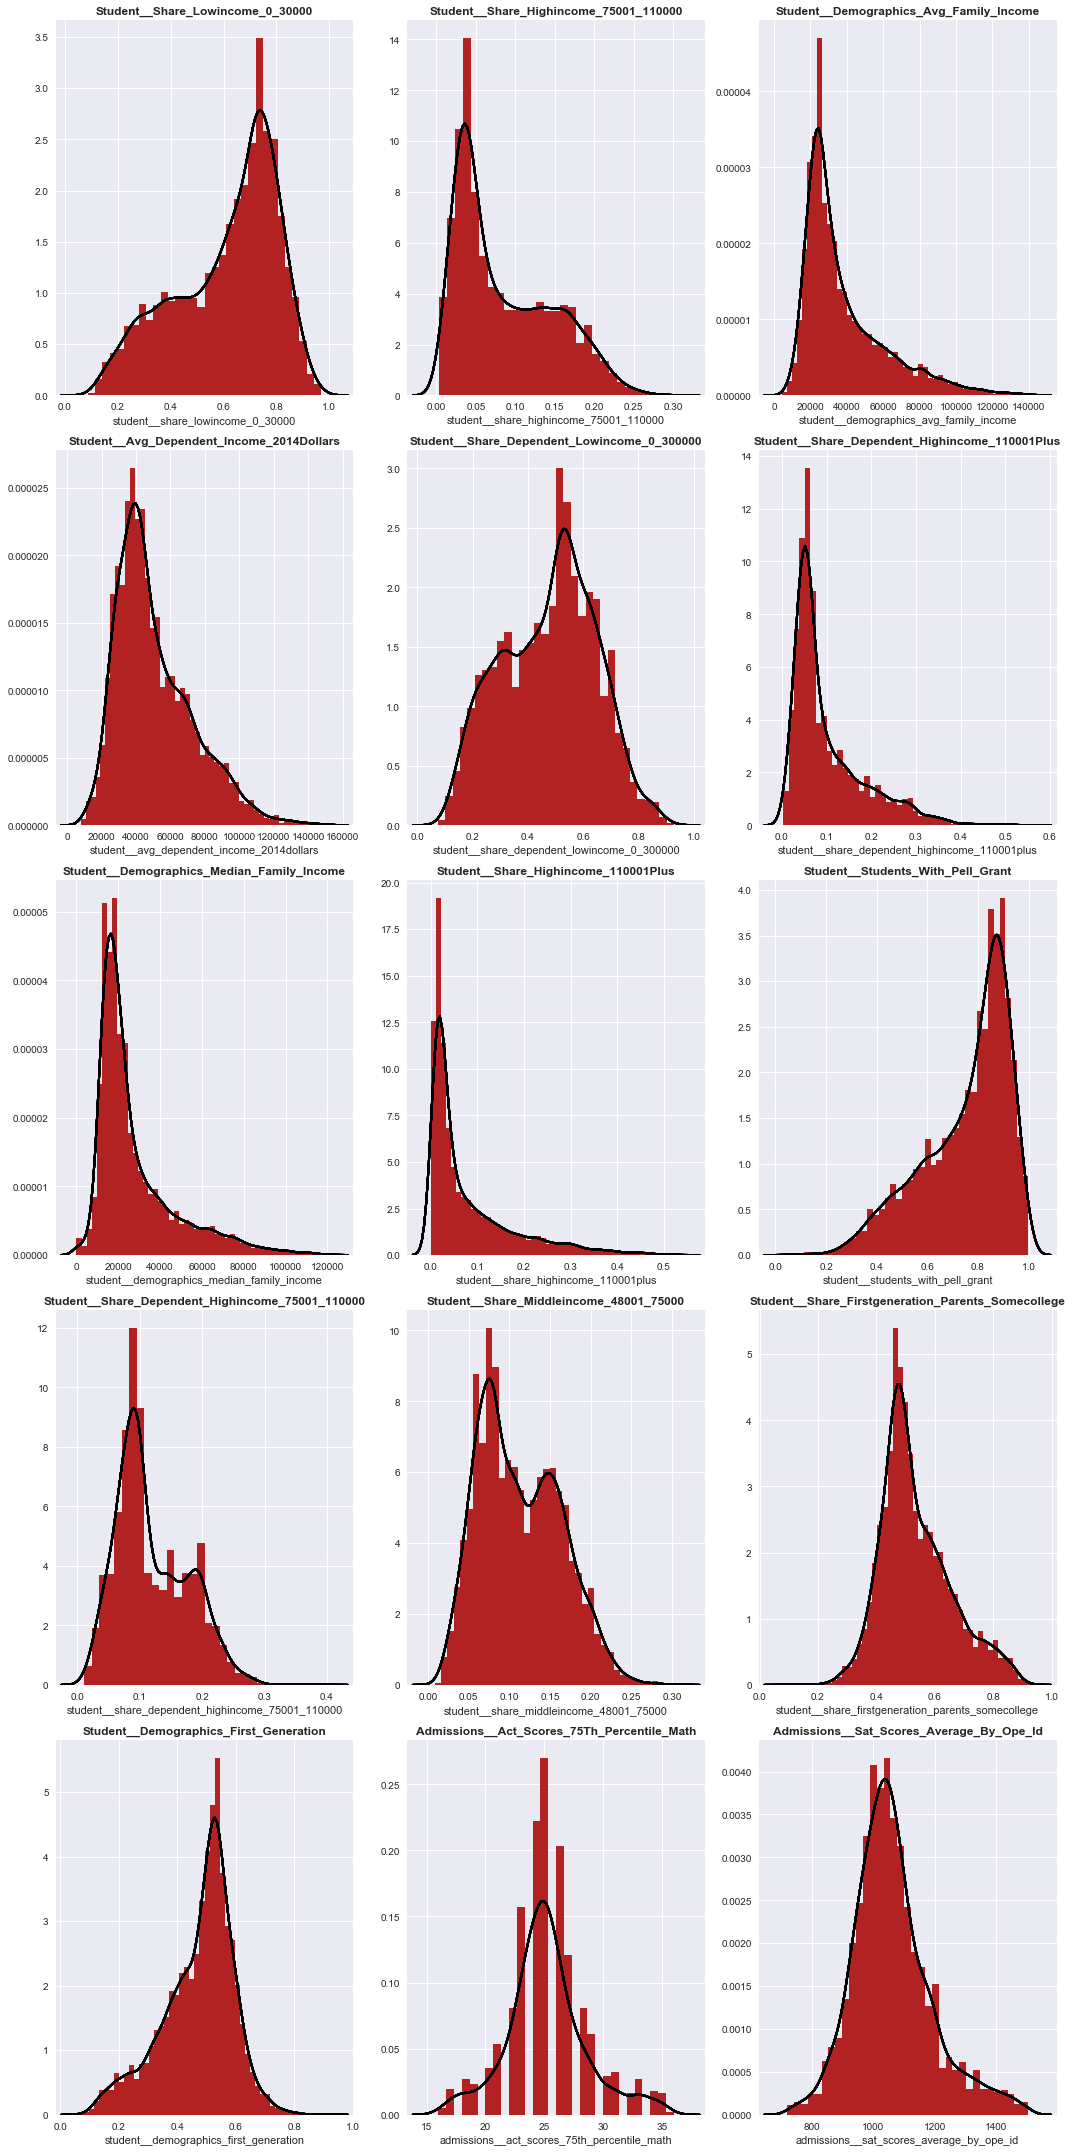

In [33]:
# sns.set_style("darkgrid");sns.set(color_codes='muted')
plt.figure(figsize=(15,30))
plt.rcParams['axes.titleweight'] = 'bold'
plt.style.use('seaborn-notebook')
sns.color_palette("muted")

fig=plt.figure

for i in range(1,len(numb_list)):
    i=1
    for element in numb_list:
        plt.subplot(5,3,i)
        plt.title(str(element).title())
        sns.distplot(df_EDA[element].dropna(), color='firebrick',kde_kws={"color": "k", "lw": 2})   
        i+=1
        plt.margins(0.02)
        plt.tight_layout()        
plt.show();

One can also gain some insight by looking at the features with the lowest correlation with the target variable. Interestingly, in the list below, 48 out of the 50 lowest correlated features are in the academic's feature.  This suggests that the academic program has little to do with student loan repayment rate.

In [33]:
# The 50 features with the lowest correlation with the target variable.
predictivity[-50:]


academics__program_certificate_lt_4_yr_legal                         0.019543
academics__program_certificate_lt_1_yr_agriculture                  -0.019125
academics__program_certificate_lt_4_yr_precision_production          0.018711
academics__program_certificate_lt_4_yr_security_law_enforcement      0.017977
academics__program_percentage_transportation                        -0.017823
academics__program_assoc_construction                               -0.017730
academics__program_certificate_lt_1_yr_communications_technology    -0.016784
academics__program_assoc_precision_production                       -0.016486
academics__program_certificate_lt_2_yr_visual_performing             0.015833
cost__net_price_private_by_income_level_48001_75000                 -0.015059
academics__program_percentage_science_technology                    -0.014804
academics__program_assoc_communication                               0.013248
academics__program_assoc_agriculture                            

With so many features in our data set, it would be nice to remove features that are highly correlated with other features as these would be considered redundant.  To get a sense of the extent of collinearity  in the dataset, we can filter our correlation matrix such that it excludes the target variable.  We can set a threshold and then filter once again to remove correlations that are equal to 1.0 which would represent self-correlation that's found on the diagonal of a confusion matrix (as exemplified [here](https://github.com/bzamecnik/neural.cz/blob/master/content/boston-dataset-exploration.md)).  

In [35]:
# Select correlations between features
attrs = round(pearson.iloc[:-1,:-1],2) # all except target
# only important correlations and not auto-correlations
threshold = 0.5

important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key])
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

Having a look at the top 30 examples of feature pairs with correlations >0.5, we can see that multicollinearity is quite extensive in our data.  The 30th example still has a correlation of 0.99!  As you'll see in the Preprocessing section, we can set up a filter in our preprocessing pipeline to help us address this issue. 

In [36]:
# Top 30 examples of correlation between features
pd.set_option('max_colwidth', -1)
unique_important_corrs[:30]

,attribute pair,correlation
1053,"(admissions__sat_scores_average_by_ope_id, cost__attendance_program_year)",-1.00
740,"(student__demographics_first_generation, student__share_firstgeneration_parents_somecollege)",-1.00
2250,"(admissions__sat_scores_average_by_ope_id, cost__tuition_program_year)",-1.00
2885,"(admissions__sat_scores_midpoint_writing, completion__completion_rate_l4yr_150_nhpi)",-1.00
2361,"(school__faculty_salary, student__share_firstgeneration_parents_middleschool)",-1.00
3085,"(completion__completion_rate_l4yr_150_nonresident_alien, student__share_firstgeneration_parents_middleschool)",-1.00
832,"(completion__completion_rate_l4yr_150_race_unknown, student__share_firstgeneration_parents_middleschool)",-1.00
3689,"(aid__median_debt_number_income_greater_than_75000, student__share_firstgeneration_parents_middleschool)",-1.00
1781,"(admissions__sat_scores_midpoint_math, completion__completion_rate_l4yr_150_nhpi)",-1.00
978,"(admissions__sat_scores_75th_percentile_writing, completion__completion_rate_l4yr_150_nhpi)",-1.00


## Preprocess Data

One of the first things we want to do in our preprocessing work is to deal with missing values.  Eventually we will impute missing values but first we need to decide how many missing values are we willing to tolerate.  As we saw earlier in the plots of missing values, some features were missing close to 100% of their values.  In this case, we'll make a cutoff such that features with >20% missing values will be dropped.  This is done by setting a threshold of non-missing values in the dropna() function. For the roughly 8700 instances in our training set, that results in a threshold of ~6970 non-missing values.  Using that threshold narrowed our feature set down to 317 from 443 features.

In [37]:
#remove features with >20% of data missing.
features_train=df_train.dropna(axis=1, thresh=6970)
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 21.4+ MB


Next, we'll do the same for missing values by row.  We don't know what the most important features are so it's possible that an instance could have a lot of missing values but contain values that are for important features. That being said, we can always revisit this step to adjust the threshold.  Before we drop any instances, however, we need to append the label feature to our dataset, so the same instances are dropped in our training set and target feature.  Setting the threshold to requiring 300 non-missing values results in the dropping of ~1000 instances.

In [38]:
#remove instances with >300 count of data missing.
features_train=pd.concat([features_train, df_label], axis='columns')
features_train=features_train.dropna(axis=0, thresh=300)

# Split training and target
df_label=pd.DataFrame(features_train['repayment_rate'])
features_train=features_train.drop('repayment_rate', axis='columns')

# Confirm training set and target have same number of instances
features_train.info()
df_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 18.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Data columns (total 1 columns):
repayment_rate    7625 non-null float64
dtypes: float64(1)
memory usage: 119.1 KB


Since we'll be making predictions on the test set based on a model trained by our training set, we need to make sure our test set is preprocessed in the same way as our training set.  We just eliminated over 100 features due to missing values so we'll want to remove those from the test set also.  We can do this by filtering the test set based on a list of column names found in the training set.

In [39]:
# Select only features in test set that are found in train set
cols_list=list(features_train)
features_test=df_test[cols_list]
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 15.5+ MB


Let's look again at plots of frequency counts of missing values by column and row after filtering by missing values.

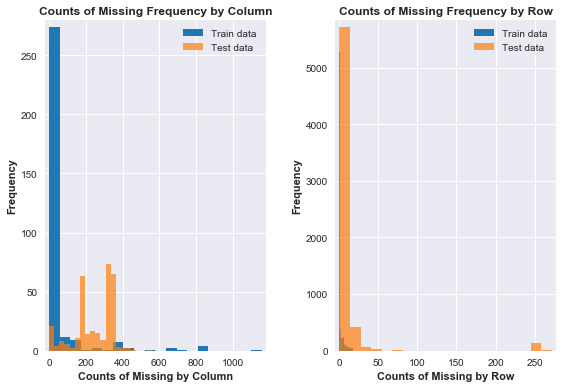

In [40]:
# Plots of missing counts by column and row
plt.style.use('seaborn-notebook')
plt.subplot(121)
train=features_train.isnull().sum()  #try label for legend?
test=features_test.isnull().sum()
_ = plt.hist(train, bins=20, label='Train data')
_ = plt.hist(test, bins=20, label='Test data', alpha=0.7)
_ = plt.title('Counts of Missing Frequency by Column')
_ = plt.xlabel('Counts of Missing by Column', fontweight='bold')
_ = plt.ylabel('Frequency', fontweight='bold')
_ = plt.legend(loc='upper right')
plt.margins(0.02)

plt.subplot(1,2,2)
train=features_train.isnull().sum(axis=1)  
test=features_test.isnull().sum(axis=1)
_ = plt.hist(train, bins=20, label='Train data')
_ = plt.hist(test, bins=20, label='Test data', alpha=0.7)
_ = plt.title('Counts of Missing Frequency by Row')
_ = plt.xlabel('Counts of Missing by Row', fontweight='bold')
_ = plt.ylabel('Frequency', fontweight='bold')
_ = plt.legend(loc='upper right')
plt.margins(0.02)
plt.tight_layout()
plt.show;

In [41]:
# Check feature dtypes of preprcessed training set
print('{} \n\nunique dtypes: {}'.format(features_train.info(),
                                        set([features_train[x].dtype for x in features_train])))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 317 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: float64(306), int64(1), object(10)
memory usage: 18.5+ MB
None 

unique dtypes: {dtype('int64'), dtype('float64'), dtype('O')}


Since we have removed features from the data set, we need to update the lists of column names by data type.  The ability to select columns by data type will be an integral part of our preprocessing pipeline we will construct in the next section. 

In [42]:
# Redefine dtype column lists after initial preprocessing
fac_cols = [x for x in features_train if features_train[x].dtype == np.dtype('O')]
float_cols = [x for x in features_train if features_train[x].dtype == np.dtype('float64')]
int_cols = [x for x in features_train if features_train[x].dtype == np.dtype('int64')]

Looking at the list of fac_cols which are features of the dtype='O' or object, we can see the list has gotten quite a bit shorter.  We're down to 10 from 23 categorical features after some preprocessing.  We might be able to reduce this list ever further by taking a close look at these features.

In [43]:
fac_cols

['report_year',
 'school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__main_campus',
 'school__online_only',
 'school__ownership',
 'school__region_id',
 'school__religious_affiliation',
 'school__state']

For instance, report_year can be dropped as it is just a book keeping relic from the data sets and wouldn't be expected to have any meaningful correlation with loan repayment rate. School_online_only might be interesting but we should first look at the value counts in each category.  It turns out the categories are highly unbalanced with >99% of the instances belonging to one of the two categories.  We come to the same conclusion for school_religious_affiliation where many of the categories are sparsely populated relative to two main categories.

In [44]:
features_train['school__online_only'].value_counts()

Not distance-education only    7591
Distance-education only        34  
Name: school__online_only, dtype: int64

Looking at the codes for states, it's not clear what they mean.  No key was provided nor, could one be found so they may just be anonymized for the competition.  At any rate, since the codes are uninterpretable, this category will be dropped.

In [45]:
features_train['school__state'].unique()

array(['dhx', 'cyf', 'noz', 'qua', 'nni', 'aku', 'wzk', 'sbh', 'tdb',
       'rbl', 'tlt', 'iya', 'fyo', 'uod', 'pqp', 'iju', 'prq', 'bbk',
       'msx', 'gai', 'afu', 'xfa', 'tus', 'fen', 'yyg', 'qbv', 'dlg',
       'exw', 'ncw', 'usz', 'zms', 'mig', 'iyc', 'krj', 'idl', 'ony',
       'fjm', 'gzi', 'ste', 'jor', 'qid', 'xtb', 'rmt', 'ugr', 'npw',
       'kta', 'cmn', 'xgy', 'xhl', 'nja', 'kho', 'bxo'], dtype=object)

In [46]:
# Drop selected columns from train and test sets
drop_cols=['report_year',
           'school__online_only',
           'school__religious_affiliation',
           'school__state', 
           'school__region_id']

features_train=features_train.drop(drop_cols, axis=1)
features_test=features_test.drop(drop_cols, axis=1)

In [47]:
# Redefine list of categorical feature names
fac_cols = [x for x in features_train if features_train[x].dtype == np.dtype('O')]
fac_cols

['school__degrees_awarded_highest',
 'school__degrees_awarded_predominant',
 'school__institutional_characteristics_level',
 'school__main_campus',
 'school__ownership']

Having settled  on our list of categorical features to keep, we will now convert them to the category data type.  We'll do this for both the training and test sets.

In [48]:
# convert objects into pandas categorical type
features_train.loc[:, fac_cols] = features_train.loc[:, fac_cols].apply(lambda x: pd.Categorical(x))
features_test.loc[:, fac_cols] = features_test.loc[:, fac_cols].apply(lambda x: pd.Categorical(x))

In [49]:
# Check for same feature count in train and test sets
features_train.info()
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 312 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: category(5), float64(306), int64(1)
memory usage: 18.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 312 entries, academics__program_assoc_agriculture to student__valid_dependency_status
dtypes: category(5), float64(306), int64(1)
memory usage: 15.0 MB


A nice function from the Phil Goddard's post I linked to in the introduction is the category_checker.  This checks whether or not your training set and test set have identical categorical levels.  The user is alerted if a mismatch is detected.  In this case, no problems were detected.

In [50]:
# Check to see if there are categories in test set that are not in training set
def category_checker(X_train, X_test, cat_col):
    allowed_values = dict()
    for col in cat_col:
        allowed_values[col] = X_train[col].values.categories
    
    warn = False
    for col in cat_col:
        tmp = X_test[col].values.categories
        for val in tmp.values.tolist():
            if val not in allowed_values[col].values.tolist():
                print('WARNING: new categorical level encountered:', col, val)
                warn = True
    
    if not warn:
        print('No problems detected')


category_checker(features_train, features_test, fac_cols)

No problems detected


As machine learning algorithms don't handle strings well, we'll encode our categorical features using the pd.get_dummies() function.  Again, we'll do this for both the training and test sets.

In [51]:
# Create dummy variables for remaining categorical features
fac_dummies_train = pd.get_dummies(features_train.loc[:, fac_cols])
fac_dummies_test = pd.get_dummies(features_test.loc[:, fac_cols])

Next we'll update our list of fac_cols to reflect the new dummy categories.

In [52]:
fac_cols=list(fac_dummies_train)
fac_cols


['school__degrees_awarded_highest_Associate degree',
 "school__degrees_awarded_highest_Bachelor's degree",
 'school__degrees_awarded_highest_Certificate degree',
 'school__degrees_awarded_highest_Graduate degree',
 'school__degrees_awarded_highest_Non-degree-granting',
 'school__degrees_awarded_predominant_Entirely graduate-degree granting',
 'school__degrees_awarded_predominant_Not classified',
 "school__degrees_awarded_predominant_Predominantly associate's-degree granting",
 "school__degrees_awarded_predominant_Predominantly bachelor's-degree granting",
 'school__degrees_awarded_predominant_Predominantly certificate-degree granting',
 'school__institutional_characteristics_level_2-year',
 'school__institutional_characteristics_level_4-year',
 'school__institutional_characteristics_level_Less-than-2-year',
 'school__main_campus_Main campus',
 'school__main_campus_Not main campus',
 'school__ownership_Private for-profit',
 'school__ownership_Private nonprofit',
 'school__ownership_Publ

So that completes the preprocessing of our data sets.  There's plenty of more processing to do such as imputing missing values, dropping zero variance features, and dropping highly correlated features.  However, we'll put these steps into our pipeline which will make things much easier when we have to also process our test set.  With that, we can save our preprocessed data sets by merging the categorical and numeric data frames.

In [53]:
# Create our final training and testing sets by merging the preprocessed categorical and numeric features.
df_trainTsf = fac_dummies_train.merge(features_train.loc[:, int_cols + float_cols],
                                      left_index = True,
                                      right_index = True)

df_testTsf=fac_dummies_test.merge(features_test.loc[:, int_cols + float_cols],
                                  left_index = True, 
                                  right_index = True)

In [54]:
# Write preprocessed training and test sets to CSV file.
df_trainTsf.to_csv('df_trainTsf.csv', index='row_id')
df_testTsf.to_csv('df_testTsf.csv', index='row_id')

# Check feature count of preprocessed training and test sets
df_trainTsf.info()
df_testTsf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7625 entries, 3 to 15095
Columns: 325 entries, school__degrees_awarded_highest_Associate degree to student__valid_dependency_status
dtypes: float64(306), int64(1), uint8(18)
memory usage: 18.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 15092
Columns: 325 entries, school__degrees_awarded_highest_Associate degree to student__valid_dependency_status
dtypes: float64(306), int64(1), uint8(18)
memory usage: 15.4 MB


In preparation for further processing and building predictive models, we want to split our training data into training and test sets.  We want to train our models with the training set and assess the performance on unseen data which will be our test set created with train_test_split.  We also want to split the training data prior to further processing such as missing value imputation. If we were to impute values with the mean of a feature prior to splitting the data, the value of the mean would be affected by the values in what will become the test set and thus information would 'leak' into our training set.  So we'll spit the training data and we'll check the shape of the data to ensure everything worked as intended.

In [55]:
# Prepare preprocessed training set for train_test_split
df_trainTsf=pd.read_csv('df_trainTsf.csv', index_col='row_id')
X=df_trainTsf.copy()
y=df_label.copy()

In [56]:
# Split the training set into training and test sets for model building
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7811)
# check shape of train and test set
X_train.shape
X_test.shape

(6100, 325)

(1525, 325)

## Define Pipeline

To simplify further processing of our data and the processing of future test data, we'll take advantage of scikit-learn's Pipeline and Feature Union classes.  Key aspects of this workflow are the custom transformers that define the work done at each step of the pipeline.  Philip Goddard has kindly made these available in a github [repo](https://github.com/philipmgoddard/pipelines/blob/master/custom_transformers.py). For instance, the DataFrameSelector makes easy work of separating numeric and categorical columns allowing for separate and parallel processing steps for different data types.  Some of the processing steps have been made 'toggleable' such as the ZeroVariance and OptionalStandardScaler transformers. The Imputer was added to the pipeline to address the missing values in our data.  

In [57]:
# Processing pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(float_cols + int_cols)),
    ('imputer', Imputer(strategy='most_frequent', axis=0)),
    ('zero_var', ZeroVariance(near_zero=True)),
    ('correlation', FindCorrelation(threshold=0.95)),
    ('opt_scaler', OptionalStandardScaler(scale=False)),
])

# data pipeline for categorical features
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(fac_cols)),
    ('zero_var', ZeroVariance(near_zero=False)),
    ('correlation', FindCorrelation(threshold=0.95)),
])

With the preprocessing steps defined in our numeric and categorical pipelines, it's time to combine those results using FeatureUnion().  This ensures that the processing is done in parallel and not sequentially where the result of one is fed into the other.  This FeatureUnion object is then made part of a larger pipeline where additional steps can be carried out on data coming out of the FeatureUnion.  For instance, there's the option for a final correlation check between processed features and a final custom transformer called PipelineChecker() which ensures that data being passed into the pipeline has the same number of features as the training data.  

In [58]:
# Full Processing pipeline
prep_pipe = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [       
            # pipeline to transform numeric features
            ('num_pipeline', num_pipeline),        
            # pipeline for categorical
            ('cat_pipeline', cat_pipeline),
        ],  
        #other arguments for FeatureUnion        
        n_jobs = -1,
        transformer_weights = None
    )), 
    
    # final correlation check
    ('correlation', FindCorrelation(threshold=0.95)),
    
    # error checking
    ('checker', PipelineChecker()),
])          

## Process Data Using Pipeline

In preparation for doing some initial screening of learning algorithms, we'll process our X_train data with our pipeline. After removing low and/or zero variance features along with highly correlated features, we've reduced our feature set to 146 from 325 features.  We could reduce the feature set even further with some feature selection methods, however, for this first pass we'll leave the feature set as is to set a baseline.  As we'll be focusing on ensemble methods where we can gain access to feature importances, there's the possibility of using scikit-learn's SelectFromModel transformer to help with feature selection efforts.

In [59]:
# Pass X_train through pipeline to process for feature selection 
X_train_pipe=prep_pipe.fit_transform(X_train)
X_train_pipe.shape
type(X_train_pipe)


(6100, 146)

numpy.ndarray

As you can see, the output of our pipeline is an array.  It would be nice to have a data frame with column names, so we can track the feature names and feature importances in our predictive models.  We can access the feature names in the pipeline using the get_params() and get_feature_names.  The latter is a function that's included in the several of the custom transformers that I referred to [earlier](https://github.com/philipmgoddard/pipelines/blob/master/custom_transformers.py).  Below is an example of how to reconstruct a data frame from the array output of the prep_pipe.

#### Construct dataframe from array output of pipeline

Below is the workflow for reconstructing a dataframe from the array that's the output from our pipeline.  

In [60]:
# Define variables for numeric and categorical features in pipeline
nums=prep_pipe.get_params()['union__num_pipeline']
cat=prep_pipe.get_params()['union__cat_pipeline']

In [61]:
# names from numeric pipeline
names_1a = nums.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = nums.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat.get_params()['zero_var'].get_feature_names(np.array(fac_cols))
names_2b= cat.get_params()['correlation'].get_feature_names(names_1b)


# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())
feature_names = prep_pipe.get_params()['correlation'].get_feature_names(names_1c)

index=X_train.index

X_trainTsf = pd.DataFrame(X_train_pipe, columns=feature_names, index=index)
# X_trainTsf.to_csv('X_trainTsf.csv')

Looking at the summary from the info() function confirms that we do indeed have our desired data frame with the proper number of columns.

In [62]:
X_trainTsf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6100 entries, 7182 to 1816
Columns: 146 entries, academics__program_assoc_biological to school__ownership_Public
dtypes: float64(146)
memory usage: 6.8 MB


## Model Selection

As part of the model selection effort, we'll compare the cross-validated performance of several learning algorithms.  From that list we'll pick the better performing models and spend some time improving performance by tuning hyperparameters.
To accomplish the initial screen of algorithms, we'll fit our pipeline to our training data and assess the performance by comparing the mean RMSE and the standard deviation across the 10 folds of cross-validation.  We'll use scikit-learn's cross_val_score() function and 10-fold cross-validation to help us rank order a handful of algorithms of interest.  

In [63]:
# Function to asses performance of regression models
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

#### Decision Tree Regressor

In [64]:
# Cross-validated decision tree regression model
tree_reg=DecisionTreeRegressor(random_state=7811)

scores = cross_val_score(tree_reg,
                         X_train_pipe,
                         y_train,
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [10.09574756 10.58964341 11.04154203 10.31057696  9.78934003  9.75985877
 10.31233756 10.59602819 10.35232971 10.9938005 ]
Mean: 10.38412047276726
Standard deviation: 0.4158431045178525


#### Random Forest Regressor

In [65]:
# Cross-validated Random Forest regression model
rf_reg = RandomForestRegressor(random_state=7811)

scores = cross_val_score(rf_reg,
                         X_train_pipe,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [7.20165225 8.05678834 8.12947886 7.16369191 7.25166407 7.46810451
 7.08913231 7.75978607 7.24928159 7.51872038]
Mean: 7.488830029894158
Standard deviation: 0.3562755974153803


#### Extreme Gradient Regressor

In [66]:
# Cross-validated extreme gradient boosting regression model
xgb_reg=xgb(random_state=7811)

scores = cross_val_score(xgb_reg,
                         X_train_pipe,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

xgb_rmse_scores = np.sqrt(-scores)
display_scores(xgb_rmse_scores)

Scores: [7.65290597 8.03113736 8.03839752 7.56458342 7.55982976 7.55117331
 7.30204523 8.01335572 7.0690593  7.9150172 ]
Mean: 7.669750479274162
Standard deviation: 0.3127691574709465


#### Extra Trees Regressor

In [67]:
# Cross-validated extra trees regression model
extree_reg = ExtraTreesRegressor(random_state=7811)

scores = cross_val_score(extree_reg,
                         X_train_pipe,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

extree_rmse_scores = np.sqrt(-scores)
display_scores(extree_rmse_scores)

Scores: [7.18942864 7.89911508 8.00065677 7.17204997 7.18194383 7.32604535
 6.88697546 7.70253194 7.02456753 7.48389782]
Mean: 7.386721239264777
Standard deviation: 0.35498853478449205


#### K-Nearest Neighbor Regressor

In [68]:
# Cross-validated K-nearest neighbors regression model
knn_reg = KNeighborsRegressor()

scores = cross_val_score(knn_reg,
                         X_train_pipe,
                         y_train.values.ravel(),
                         scoring='neg_mean_squared_error', 
                         cv=10,
                         n_jobs=-1)

knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

Scores: [8.58796104 9.07163015 9.44855839 8.97661626 8.37493434 8.15626571
 8.27944567 8.7481387  8.42939465 9.04217655]
Mean: 8.7115121472846
Standard deviation: 0.3945887233380218


Based on the initial screening, we'll focus our efforts on optimizing the Random Forest, Extreme Gradient Boosting, and the Extra Trees regression models.

## Model Tuning

Another advantage of using the Pipeline class is that a learning algorithm can be appended to a copy of the pipeline object.  Once the pipeline has been fit to your training data, making predictions is simply a matter of using the predict function of the trained pipeline object on your test data.

#### XGB Regressor

In [69]:
# Append an extreme gradient boosting regressor estimator to full pipeline
xgb_est=copy.deepcopy(prep_pipe)

xgb_est.steps.append(('xgb_reg', xgb(random_state=7811)))

We'll use RandomizedSearchCV to search the parameter space of interest.  Below, the specific or the range of parameter values to be sampled are defined.

In [70]:
# List of xgb parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(3000,6000)
learning_rate= [0.01, 0.05, 0.1, 0.5]
sub=[0.7, 0.8, 0.9]
max_depth=sp_randint(1,15)
alpha=[0, 10, 100]
child=sp_randint(1,15)

# Create dictionary of xgb parameters to be searched
parameters = dict(xgb_reg__n_estimators = n_est,
                xgb_reg__learning_rate = learning_rate,
                xgb_reg__subsample = sub,
                xgb_reg__max_depth = max_depth,
                xgb_reg__reg_alpha = alpha,
                xgb_reg__min_child_weight = child)

Now it's time to instantiate our RandomizedSearchCV object and fit it to our training data.  We'll use joblib.dump to 'persist' our model so we can retrieve it later.

In [71]:
# Instantiate RandomizedSearchCV object
rand_search_xgb = RandomizedSearchCV(estimator = xgb_est,
                             param_distributions = parameters,
                             cv=5,
                             refit=True,
                             n_jobs=1,
                             scoring='neg_mean_squared_error',
                             random_state=7811)
# Fit RandomizedSearchCV objet to data
rand_search_xgb.fit(X_train, y_train.values.ravel());

joblib.dump(rand_search_xgb, 'rand_search_xgb.pkl')

Retrieving a pickled model is accomplished with joblib.load.

In [72]:
# Load the saved model
rand_search_xgb = joblib.load('rand_search_xgb.pkl')

We can access the parameters that provided the best result on the holdout data of cross-validation folds with the best_params attribute.  The mean of the best cross-validated score from the best model can be accessed with the best_score attribute.  As the goal of this competition was to get the lowest RMSE, the model was optimized using 'neg_mean_squared_error'.  

In [73]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_xgb.best_params_,
                                                        rand_search_xgb.best_score_))

Chosen params: {'xgb_reg__learning_rate': 0.05, 'xgb_reg__max_depth': 5, 'xgb_reg__min_child_weight': 14, 'xgb_reg__n_estimators': 3328, 'xgb_reg__reg_alpha': 100, 'xgb_reg__subsample': 0.7}

Train Best -MSE score: -44.680


Finally, we'll make predictions on our test set and assess the RMSE.  With the XGB model the RMSE was 6.21 which compared favorably to the other models.

In [74]:
# Use xgb model to make predictionns on the unseen test data
# rand_search_xgb = joblib.load('rand_search_xgb.pkl')

y_pred=rand_search_xgb.predict(X_test)
print(rand_search_xgb.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-38.676258951469784
6.21902395488792


We can visualize our prediction results by plotting the predicted versus actual repayment rate.  

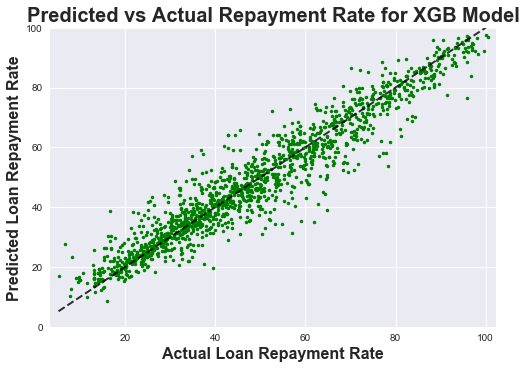

In [75]:
# plot of predicted vs actual repayment rate for XGB model
plt.style.use('seaborn-notebook')
sns.set_style("darkgrid")
_ = plt.plot(y_test, y_pred, marker='.',color='g', linestyle='none')
_ = plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, alpha=0.8)
_ = plt.title('Predicted vs Actual Repayment Rate for XGB Model', fontsize=20)
_ = plt.xlabel('Actual Loan Repayment Rate',fontweight='bold', fontsize=16)
_ = plt.ylabel('Predicted Loan Repayment Rate', fontweight='bold', fontsize=16)
_ =  plt.ylim(0,100)
plt.margins(0.02)
plt.show();

Now we can extract information from our pipeline, so we can identify the feature names which we'll need for further analysis of our modeling results.

In [76]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_xgb = rand_search_xgb.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_xgb = rand_search_xgb.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_xgb.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_xgb.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_xgb.get_params()['zero_var'].get_feature_names(np.array(fac_cols))
names_2b = cat_pipe_xgb.get_params()['correlation'].get_feature_names(names_1b)

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())
xgb_feature_names = rand_search_xgb.best_estimator_.get_params()['correlation'].get_feature_names(names_1c)

The extracted feature names can now be used to create a sorted list of feature importances from the XGB model.  Looking at the top 10 features by importance, we can gain some insight into what features are important in predicting student loan repayment rate.  

In [77]:
# Get sorted list of feature importances from xgb regressor model
xgb_model = rand_search_xgb.best_estimator_.get_params()['xgb_reg']
xgb_importance = xgb_model.feature_importances_
x=sorted(list(zip(xgb_importance, xgb_feature_names)), key = lambda x: x[0], reverse=True)
x[:10]

[(0.027783513, 'student__demographics_race_ethnicity_black'),
 (0.025530796, 'aid__median_debt_number_pell_grant'),
 (0.022508401, 'school__instructional_expenditure_per_fte'),
 (0.020912725, 'student__demographics_women'),
 (0.020856408, 'student__share_middleincome_30001_48000'),
 (0.020631136, 'aid__federal_loan_rate'),
 (0.020387093, 'student__demographics_race_ethnicity_hispanic'),
 (0.020143047, 'aid__students_with_any_loan'),
 (0.019899003, 'student__demographics_female_share'),
 (0.01973005, 'student__demographics_married')]

We can also visualize the feature importances with a bar graph.

In [78]:
# create a sorted dataframe of features and their importances
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_xgb = z.sort_values('importance', ascending=True).set_index('feature')
imp_xgb.to_csv('imp_xgb.csv')

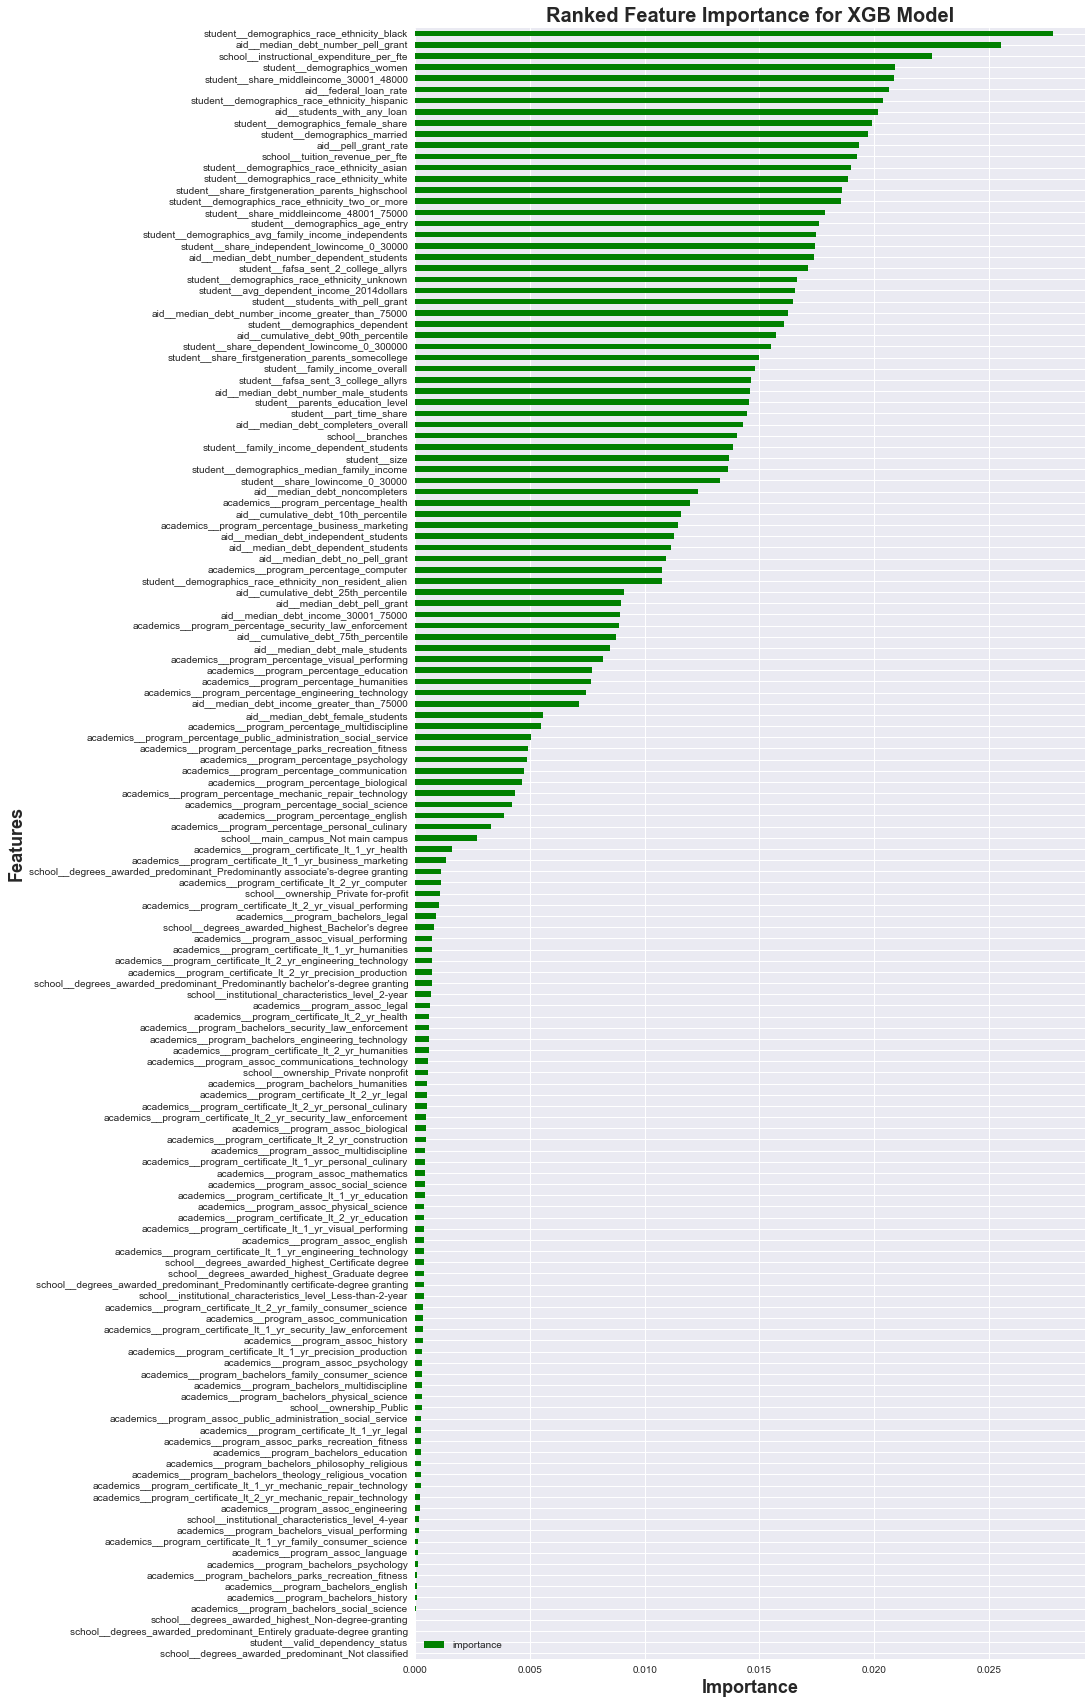

In [79]:
# Plot feature importances
# imp_xgb=pd.read_csv('imp_xgb.csv', index_col='feature')
imp_xgb.plot(kind='barh', 
             color='g',
             figsize=(12,30));
plt.title('Ranked Feature Importance for XGB Model', fontsize=20)
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Features', fontsize=18, fontweight='bold');

We can see that features having the highest importance in the XGB model have to do with student demographics including ethnicity and gender along with features realated to the aid category.

#### Random Forest

We can repeat the above steps followed for training the XGB regressor model.  Namely, fit the RandomizedSearchCV object to the training data, assess the CV training error, and make predictions on the unseen test set.  After assessing the error of the predictions, we can again obtain the feature names from our pipeline object to allow us to look at feature importances.

In [80]:
# Append a Random Forest regressor estimator to full pipeline
rf_est=copy.deepcopy(prep_pipe)
rf_est.steps.append(('rf_reg', RandomForestRegressor(random_state=7811)))

In [81]:
# List of Random Forest parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(10,500)
parameters=dict(rf_reg__n_estimators=n_est)

# Instantiate RandomizedSearchCV object
rand_search_rf=RandomizedSearchCV(estimator = rf_est, 
                           param_distributions=parameters,
                           refit=True,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_iter=n_iter, 
                           random_state=7811)

# Fit RandomizedSearchCV objet to data
rand_search_rf.fit(X_train, y_train.values.ravel());

In [82]:
# Save the fitted model
joblib.dump(rand_search_rf, 'rand_search_rf.pkl')

In [83]:
# Load the saved model
# rand_search_rf = joblib.load('rand_search_rf.pkl')

It seems the performance of our Random Forest model was not as good as the XGB regression model.

In [84]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_rf.best_params_,
                                                        rand_search_rf.best_score_))

Chosen params: {'rf_reg__n_estimators': 523}

Train Best -MSE score: -52.274


In [85]:
# Use Random Forest model to make predictionns on the unseen test data

# rand_search_rf = joblib.load('rand_search_rf.pkl')

y_pred=rand_search_rf.predict(X_test)
print(rand_search_rf.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-46.66687658791858
6.831315875284833


In [86]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_rf = rand_search_rf.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_rf = rand_search_rf.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_rf.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_rf.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_rf.get_params()['zero_var'].get_feature_names(np.array(fac_cols))
names_2b = cat_pipe_rf.get_params()['correlation'].get_feature_names(np.array(names_1b))

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())
rf_feature_names = rand_search_rf.best_estimator_.get_params()['correlation'].get_feature_names(names_1c)

The RF model also differed from the XGB model in terms of feature importance rankings.  The relative feature importance for the RF model dropped off quite abruptly.  This becomes evident in the bar plot of feature importances below. The most important feature by far was the student's median family income.

In [87]:
rf_model = rand_search_rf.best_estimator_.get_params()['rf_reg']
rf_importance = rf_model.feature_importances_
x=sorted(list(zip( rf_importance, rf_feature_names )), key = lambda x: x[0], reverse=True)
x[:10]

[(0.5192214457051603, 'student__demographics_median_family_income'),
 (0.19682068342889425, 'student__share_lowincome_0_30000'),
 (0.03879527698578964, 'student__avg_dependent_income_2014dollars'),
 (0.027804809273316567, 'student__demographics_race_ethnicity_black'),
 (0.014052508732318865, 'aid__median_debt_number_pell_grant'),
 (0.009634295426434363, 'aid__cumulative_debt_90th_percentile'),
 (0.008954003256059537, 'aid__median_debt_dependent_students'),
 (0.008930003133046755, 'student__share_firstgeneration_parents_somecollege'),
 (0.008617099053445829, 'aid__median_debt_female_students'),
 (0.008440557678600837, 'student__demographics_race_ethnicity_asian')]

In [88]:
# Get sorted list of feature importances from Random Forest regressor model
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_rf = z.sort_values('importance', ascending=True).set_index('feature')
# imp_rf.to_csv('imp_rf.csv')

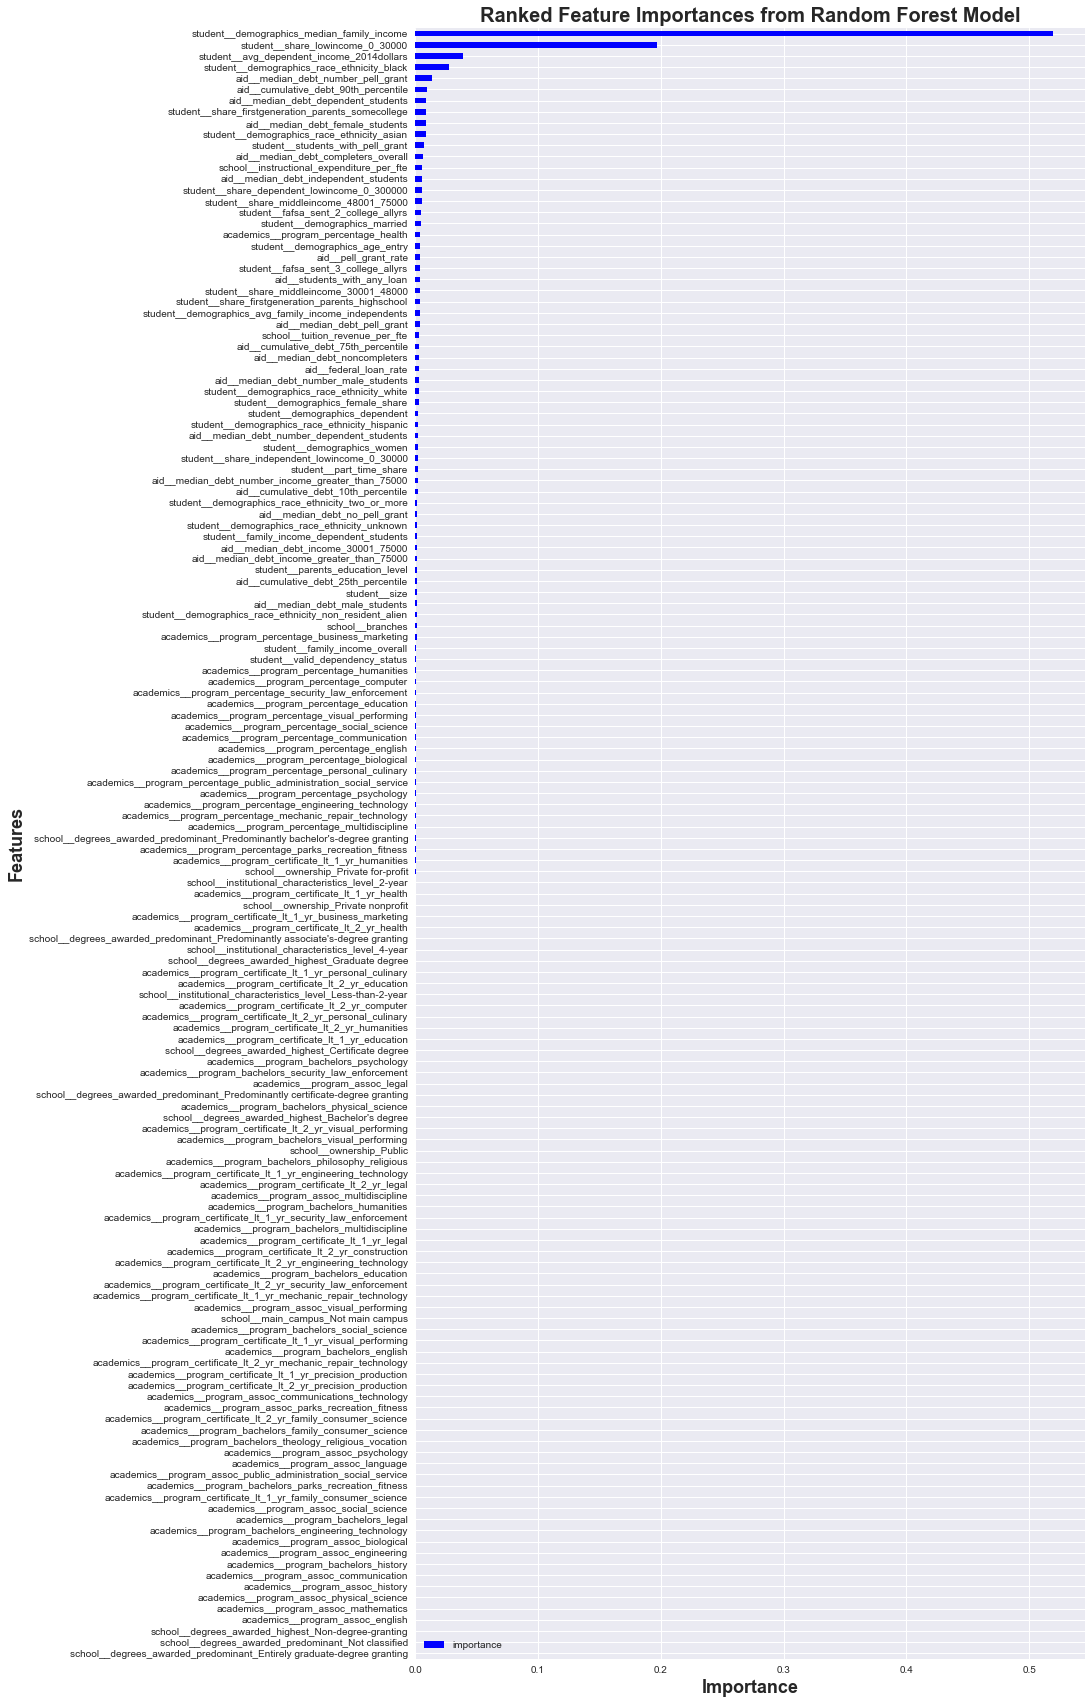

In [89]:
# Plot feature importances
# imp_rf = pd.read_csv('imp_rf.csv',index_col='feature')
imp_rf.plot(kind='barh',
            color='b',
            figsize=(12,30));
plt.title('Ranked Feature Importances from Random Forest Model', fontsize=20)
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Features', fontsize=18, fontweight='bold');

#### Extra Trees Regressor

Finally, we'll repeat the above steps to tune an Extra Trees regression model, assess model performance, and look at feature importance.  

In [90]:
# Append an Extra Trees regressor estimator to full pipeline
exTree_est=copy.deepcopy(prep_pipe)

exTree_est.steps.append(('exTree_reg', ExtraTreesRegressor(random_state=7811)))

In [91]:
# List of Extra Trees parameters to search with RandomizedSearchCV
n_iter=10
n_est=sp_randint(10,500)
max_feat=sp_randint(5,61)

# Create dictionary of Extra Trees parameters to be searched
parameters=dict(exTree_reg__n_estimators=n_est,
                exTree_reg__max_features=max_feat)

In [92]:
# Instantiate RandomizedSearchCV object
rand_search_exTree=RandomizedSearchCV(estimator = exTree_est, 
                           param_distributions=parameters,
                           refit=True,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_iter=n_iter, 
                           random_state=7811)

# Fit RandomizedSearchCV objet to data
rand_search_exTree.fit(X_train, y_train.values.ravel());

In [93]:
# Save the fitted model
joblib.dump(rand_search_exTree, 'rand_search_exTree.pkl')

In [94]:
# Load the fitted model
# rand_search_exTree = joblib.load('rand_search_exTree.pkl')

In [95]:
# Print the best paramaters and best score using best_params_ and best_score_ attributes
print('Chosen params: {}\n\nTrain Best -MSE score: {:0.3f}'.format(rand_search_exTree.best_params_,
                                                        rand_search_exTree.best_score_))

Chosen params: {'exTree_reg__max_features': 60, 'exTree_reg__n_estimators': 251}

Train Best -MSE score: -49.302


The Extra Trees Regressor  model performed better than the RF model but slighlt worse than XGB regression model.

In [96]:
# Use Extra Trees model to make predictionns on the unseen test data
y_pred=rand_search_exTree.predict(X_test)
print(rand_search_exTree.score(X_test, y_test))

mse_scores= mean_squared_error(y_test, y_pred)
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

-41.73602863793018
6.460342764740132


In [97]:
# rebuild features. 

# can access parts of the CV pipeline object like so:
num_pipe_exTree = rand_search_exTree.best_estimator_.get_params()['union__num_pipeline']
cat_pipe_exTree = rand_search_exTree.best_estimator_.get_params()['union__cat_pipeline']

# names from numerical pipeline
names_1a = num_pipe_exTree.get_params()['zero_var'].get_feature_names(np.array(float_cols + int_cols))
names_2a = num_pipe_exTree.get_params()['correlation'].get_feature_names(names_1a)

# names from categorical pipeline
names_1b = cat_pipe_exTree.get_params()['zero_var'].get_feature_names(np.array(fac_cols))
names_2b = cat_pipe_exTree.get_params()['correlation'].get_feature_names(np.array(names_1b))

# Combined list of feature names
names_1c = np.array(names_2a.tolist() + names_2b.tolist())
extree_feature_names = rand_search_exTree.best_estimator_.get_params()['correlation'].get_feature_names(names_1c)

The top feature importances for the Extra Trees regression model had more in common with the RF model than the XGB regression model.  The Extra Trees model was similar to the Random Forest model in that features related to the student's family income were found to be most important in predicting loan repayment rate.

In [98]:
# Get sorted list of feature importances from Extra Trees regressor model
exTree_model = rand_search_exTree.best_estimator_.get_params()['exTree_reg']
exTree_importance = exTree_model.feature_importances_
x=sorted(list(zip( exTree_importance, extree_feature_names)), key = lambda x: x[0], reverse=True)
x[:10]

[(0.16084446652380344, 'student__share_lowincome_0_30000'),
 (0.10645609694114205, 'student__avg_dependent_income_2014dollars'),
 (0.10639338403888965, 'student__demographics_median_family_income'),
 (0.09223971136891973, 'student__students_with_pell_grant'),
 (0.057449512244247485, 'school__ownership_Private for-profit'),
 (0.048450444022199925, 'student__share_middleincome_48001_75000'),
 (0.03215505484196427, 'aid__pell_grant_rate'),
 (0.031878527265679864, 'student__share_firstgeneration_parents_somecollege'),
 (0.031514137129345136, 'student__share_dependent_lowincome_0_300000'),
 (0.028965509720738344, 'student__demographics_race_ethnicity_black')]

In [99]:
# create a sorted dataframe of features and their importances
z = pd.DataFrame(data=x, columns=['importance', 'feature'])
imp_extree = z.sort_values('importance', ascending=True).set_index('feature')
imp_extree.to_csv('imp_extree.csv')

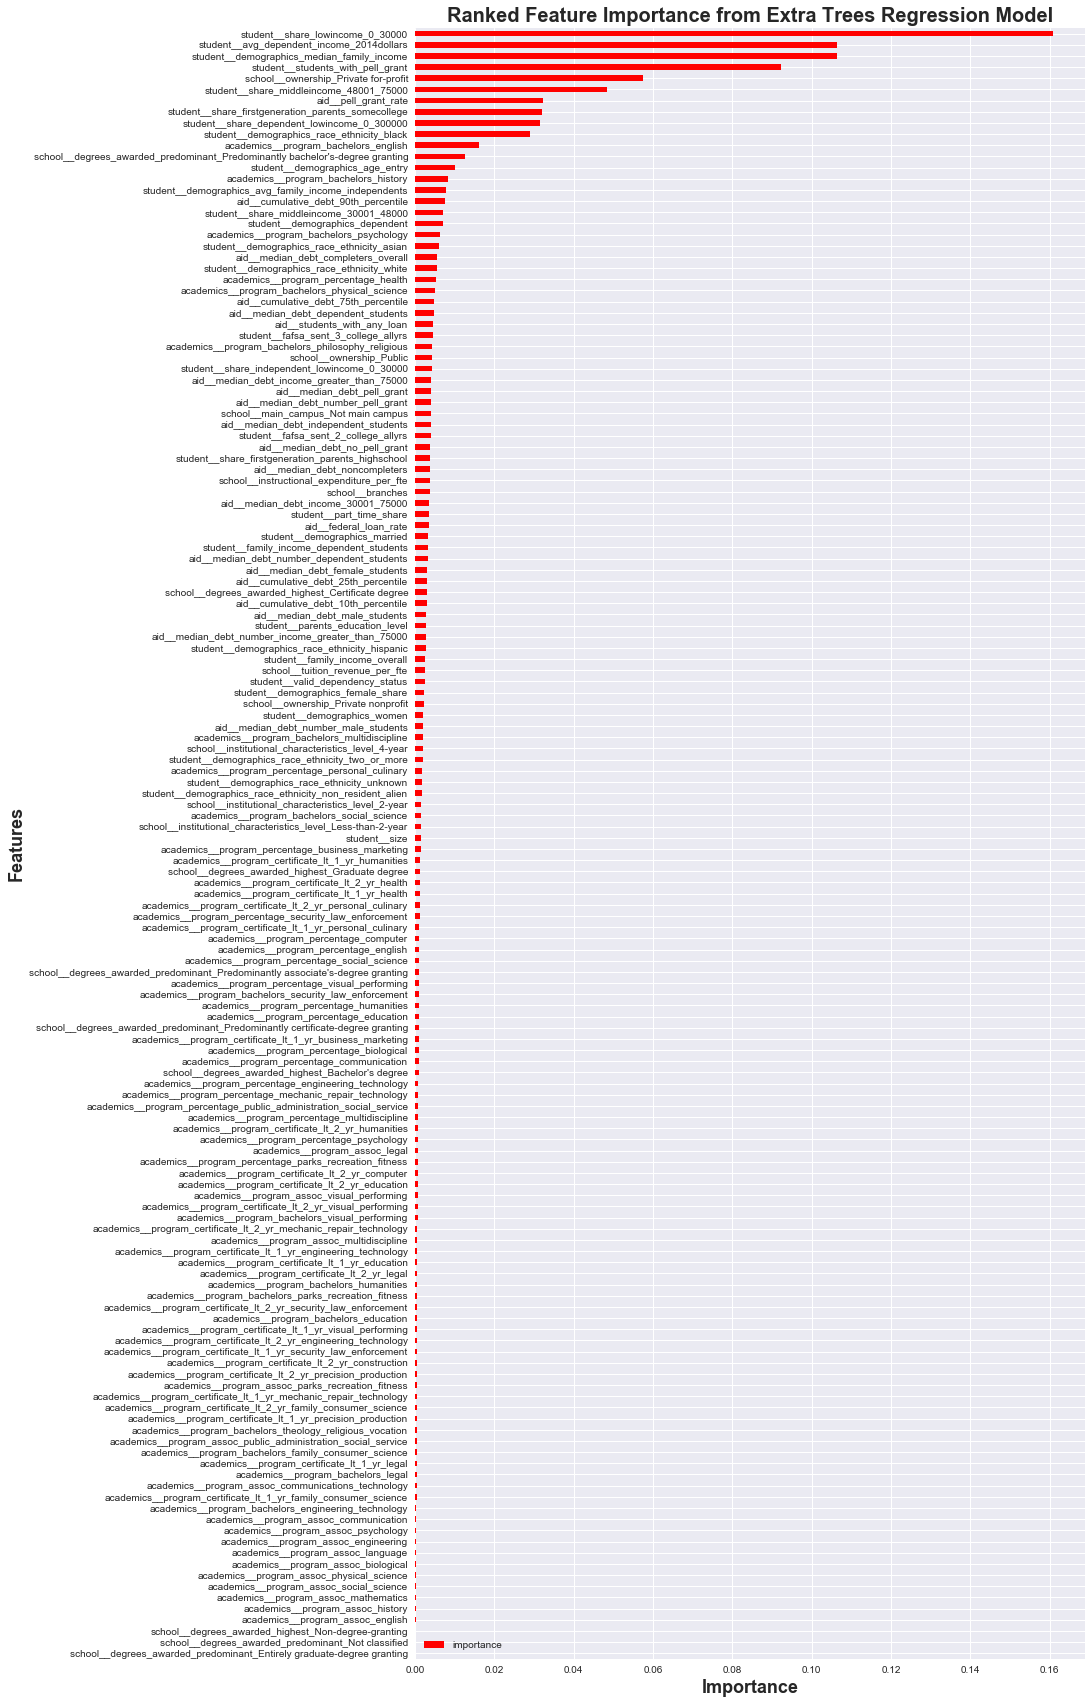

In [100]:
# Plot feature importances
# imp_exTree=pd.read_csv('imp_exTree.csv',index_col='feature')
imp_extree.plot(kind='barh',
                color='r', 
                figsize=(12,30))
plt.title('Ranked Feature Importance from Extra Trees Regression Model', fontsize=20)
plt.xlabel('Importance', fontsize=18, fontweight='bold')
plt.ylabel('Features', fontsize=18, fontweight='bold');

## Prediction on Test Set for Submission

The XGB regression model showed the best performance on unseen data after tuning the model.  To make predictions on the competition test set, we can simply use the xbg pipeline object and use the predict function on the test set.

In [101]:
# Load the pickled xgb model
rand_search_xgb = joblib.load('rand_search_xgb.pkl')
# Load the preprocessed test set
df_testTsf = pd.read_csv('df_testTsf.csv', index_col='row_id')

In [102]:
# get the index of the test set - to be used in requested CSV format for competition
test_index = df_testTsf.index.tolist()
# Make predictions on the test set
repayment_rate_pred = rand_search_xgb.predict(df_testTsf)

In [103]:
##  Create CSV submission file
pd.DataFrame({'row_id': test_index, 'repayment_rate' : repayment_rate_pred}).set_index('row_id').to_csv('Capstone_submission.csv')

## Summary

In summary, predictive regression models were built to predict student loan repayment rate.  The best performing model was the Extreme Gradient Boosting regression model with a RMSE on unseen test data of 6.2.  Aside from building a high-performance model, a focus of this work also was to demonstrate the use of a processing pipeline to simplify the data science workflow.

Initial EDA determined that many of the features related to family income were highly correlated with loan repayment rate.  Features related to low income were negatively correlated while features related to higher income were positively related to repayment rate.  Good performance on SAT and ACT tests was also positively correlated with repayment rate.  Interestingly, features that showed the least correlation with repayment rate were features related to academic programs.  Categorical features that appeared to have the most impact on repayment rate were school ownership and the school campus.  Private for-profit schools had a lower median repayment rate than either private for-profit or public schools.  Main campus schools had a higher repayment rate than non-main campus schools.

The Random Forest model and Extra Trees model both found that features related to a student's family income level to be important in predicting loan repayment rate.  The relative feature importances for the Extreme Gradient Boosting model dropped off more gradually than the other models resulting in the top ten features having similar importance values.  While the XGB model did find student family income to be an important feature, there was more emphasis on features related to student ethnicity and gender.

With regards to future work, there is an opportunity to explore methods to further reduce the number of features.  For instance, using the feature importances from the fitted models and the SelectFromModel transformer, the impact on the adjustment of a feature importance threshold and model performance can be explored.